In [1]:
from env import VanillaEnv, CrafterReplayBuffer
import numpy as np
import matplotlib.pyplot as plt
import os
import random


c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


Done! Episode Reward:  1.0999999999999999
(3, 64, 64)


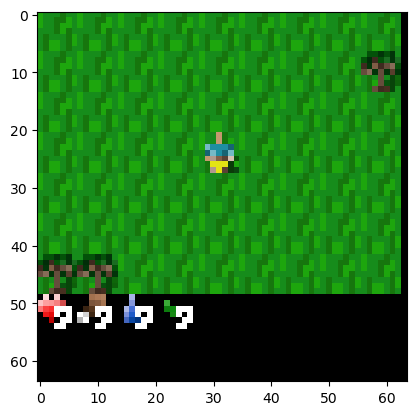

In [2]:
env =  VanillaEnv(seed=4)
state = env.reset()
done = False
rewards = []
frames_arr = []

while not done:
    action = np.random.randint(low=0, high=17)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[0], 0, -1), vmin=0., vmax=1.)
        break

In [3]:
buffer = CrafterReplayBuffer('cpu', 0, './dataset')

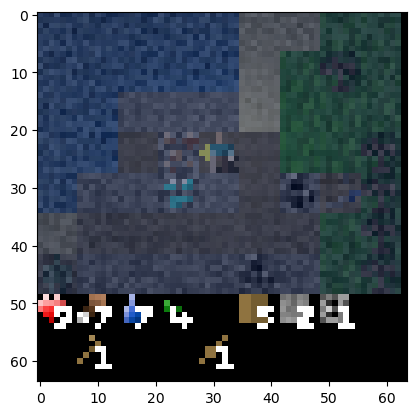

In [4]:
image, action = buffer.sample(1)
plt.imshow(np.moveaxis(image.numpy().squeeze(), 0, -1), vmin=0., vmax=1.)

c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


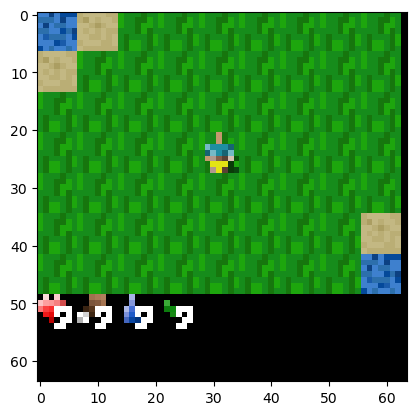

In [5]:
import gym
import crafter

env = env = crafter.Env(seed="6alZBPJBjvEr2YMpv6VDbP")  # Or CrafterNoReward-v1
env = crafter.Recorder(
  env, './path/to/logdir',
  save_stats=True,
  save_video=False,
  save_episode=False,
)
obs = env.reset()
plt.imshow(obs)


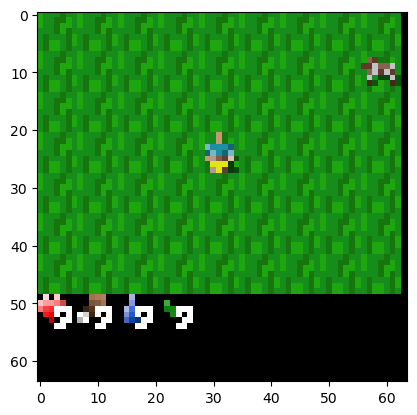

In [6]:
with np.load("./dataset" + os.sep + "6alZBPJBjvEr2YMpv6VDbP.npz") as data:
    plt.imshow(data['image'][0])

In [7]:
print(env.action_space)

Discrete(17)


In [8]:
from policy import ActorNet

model = ActorNet()

X, y = buffer.sample(23)
print(X.shape)
print(X.dtype)

model.forward(X, contrastive=False)

torch.Size([23, 3, 64, 64])
torch.float32


tensor([[-0.0152, -0.0606,  0.0419,  0.0587,  0.0198, -0.0078, -0.0096, -0.0271,
         -0.0310, -0.0470,  0.0631, -0.0207,  0.0496, -0.0365, -0.0640,  0.0346,
          0.0100],
        [-0.0106, -0.0673,  0.0366,  0.0566,  0.0220, -0.0049, -0.0067, -0.0308,
         -0.0320, -0.0459,  0.0650, -0.0193,  0.0464, -0.0410, -0.0620,  0.0343,
          0.0071],
        [-0.0209, -0.0612,  0.0449,  0.0584,  0.0218, -0.0090, -0.0073, -0.0269,
         -0.0304, -0.0501,  0.0646, -0.0183,  0.0477, -0.0354, -0.0703,  0.0274,
          0.0104],
        [-0.0189, -0.0518,  0.0448,  0.0602,  0.0191, -0.0077, -0.0071, -0.0205,
         -0.0295, -0.0460,  0.0626, -0.0212,  0.0538, -0.0429, -0.0650,  0.0354,
          0.0070],
        [-0.0208, -0.0575,  0.0411,  0.0572,  0.0255, -0.0014, -0.0059, -0.0244,
         -0.0285, -0.0506,  0.0670, -0.0234,  0.0433, -0.0378, -0.0644,  0.0327,
          0.0078],
        [-0.0199, -0.0618,  0.0406,  0.0600,  0.0194, -0.0034, -0.0048, -0.0230,
         -0.03